# When did the two highest mega floods in the Amazon occur?
We found two simulated mega-floods, that largely deviated from what can be expected from the observed record. Here we will perform a first analysis to figure out when they happened. 

In [3]:
##Load pacakages
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import cartopy
import cartopy.crs as ccrs


In [2]:
##This is so variables get printed within jupyter
from IPython.core.interactiveshell import InteractiveShell 
InteractiveShell.ast_node_interactivity = "all"

We are loading the data from ([der Wiel et al., 2019](https://doi.org/10.1029/2019GL081967)), openly available through https://zenodo.org/record/2536396#.XnnBgohKiUk.

Note the error message in regard to the time. I suspect this is because it is just a number from 1:2000 -> there are 2000 present-climate and future-climate years.  

## UNSEEN floods

Load the simulations (discharge_monthAvg_presentDay.nc) available at https://doi.org/10.5281/zenodo.4585400
 or download them in the *../Data*
directory by uncommenting and running the following line:

In [16]:
!wget -O ../Data/discharge_monthAvg_presentDay.nc https://zenodo.org/record/4585400/files/discharge_monthAvg_presentDay.nc

--2021-10-07 13:09:36--  https://zenodo.org/record/4585400/files/discharge_monthAvg_presentDay.nc
Resolving zenodo.org (zenodo.org)... 137.138.76.77
Connecting to zenodo.org (zenodo.org)|137.138.76.77|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 247755472 (236M) [application/octet-stream]
Saving to: ‘../Data/discharge_monthAvg_presentDay.nc’

100%[======================================>] 247,755,472 40.7MB/s   in 5.8s   

2021-10-07 13:09:42 (40.7 MB/s) - ‘../Data/discharge_monthAvg_presentDay.nc’ saved [247755472/247755472]



In [17]:
Amazon_simulated = xr.open_dataset('../Data/discharge_monthAvg_presentDay.nc')
Amazon_simulated #to show

/home/tike/miniconda3/envs/exp/lib/python3.8/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/home/tike/miniconda3/envs/exp/lib/python3.8/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


<xarray.Dataset>
Dimensions:    (lat: 44, lon: 70, time: 24000)
Coordinates:
  * time       (time) object 0001-01-03 00:00:00 ... 2055-01-01 00:00:00
  * lat        (lat) float32 4.75 4.25 3.75 3.25 ... -15.25 -15.75 -16.25 -16.75
  * lon        (lon) float32 -79.75 -79.25 -78.75 ... -46.25 -45.75 -45.25
Data variables:
    discharge  (time, lat, lon) float32 ...

In [3]:
dirname = r'/home/tike/Discharge/'

Global_discharge = xr.open_dataset(dirname + 'Zenodo/presentYearMax.nc')
Global_discharge

/home/tike/miniconda3/envs/exp/lib/python3.8/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/home/tike/miniconda3/envs/exp/lib/python3.8/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


<xarray.Dataset>
Dimensions:    (lat: 360, lon: 720, time: 2000)
Coordinates:
  * time       (time) object 0001-01-01 00:00:00 ... 2000-01-01 00:00:00
  * lat        (lat) float32 89.75 89.25 88.75 88.25 ... -88.75 -89.25 -89.75
  * lon        (lon) float32 -179.75 -179.25 -178.75 ... 178.75 179.25 179.75
Data variables:
    discharge  (time, lat, lon) float32 ...

## Selecting the streamflow timeseries for the mouth of the Amazon

The files contain 2000 years of annual monthly maximum streamflow. 
So far I have used the mouth of the river by selecting the gridcell with the highest streamflow.

Todo
- [] Change the location to Obidos for comparison to observed?


In [4]:
##Spatial domain of the Amazon basin
lats = [5, -17]
lons = [-80, -45]

## We cut out the Amazon region
Amazon_discharge = Global_discharge['discharge'].sel(lon=slice(lons[0], lons[1]),
                                           lat=slice(lats[0], lats[1]))
Amazon_discharge

<xarray.DataArray 'discharge' (time: 2000, lat: 44, lon: 70)>
[6160000 values with dtype=float32]
Coordinates:
  * time     (time) object 0001-01-01 00:00:00 ... 2000-01-01 00:00:00
  * lat      (lat) float32 4.75 4.25 3.75 3.25 ... -15.25 -15.75 -16.25 -16.75
  * lon      (lon) float32 -79.75 -79.25 -78.75 -78.25 ... -46.25 -45.75 -45.25
Attributes:
    standard_name:  discharge
    long_name:      discharge
    units:          m3s-1

In [5]:
### Select amazon timeseries -> 1 select the highest mean discharge over the domain (which is at the mouth of the river)
Gridpoint_Highest_mean = Amazon_discharge.mean(dim=['time']).max(
    dim=['lon', 'lat'])
Gridpoint_Highest_mean

/home/tike/miniconda3/envs/exp/lib/python3.8/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.DataArray 'discharge' ()>
array(349802.16, dtype=float32)

In [6]:
## Select amazon timeseries -> 2. extract the corresponding grid cell with the highest discharge 
Amazon_timeseries = Amazon_discharge.where(
    Amazon_discharge.mean(dim=['time']) == Gridpoint_Highest_mean, drop=True)

Amazon_timeseries

<xarray.DataArray 'discharge' (time: 2000, lat: 1, lon: 1)>
array([[[288759.75]],

       [[315094.16]],

       [[358959.7 ]],

       ...,

       [[406101.53]],

       [[389518.06]],

       [[355163.88]]], dtype=float32)
Coordinates:
  * time     (time) object 0001-01-01 00:00:00 ... 2000-01-01 00:00:00
  * lat      (lat) float32 0.25
  * lon      (lon) float32 -50.25
Attributes:
    standard_name:  discharge
    long_name:      discharge
    units:          m3s-1

In [7]:
##lat 0.25
##lon -50.25

## Alternative: select with latlon
Amazon_timeseries_p = Global_discharge['discharge'].sel(lon=-50.25,
                                             lat=0.25)  ## just to check
# Amazon_timeseries_f = xr_f['discharge'].sel(lon=-50.25,
#                                             lat=0.25)  # And select future

# And save to be used in R
#np.savetxt(dirname+'presentYearMax_Amazon.txt',Amazon_timeseries_p.values.flatten())
#np.savetxt(dirname+'futureYearMax_Amazon.txt',Amazon_timeseries_f.values.flatten())

## Mega-flood indices

We have now selected the timeseries for the mouth of the Amazon. Next step is to extract the two highest events, that are deviating a lot from the rest (see [Extreme value analysis](../R/Amazon.md).

The highest flood occurs on **1568** (index 1567 in python).
The second highest on **1731** (index 1730 in python).

For megaflood1 this corresponds to:
Year: 2037
Start: 13
Ensemble: 13

And for megaflood2 this corresponds to:
Year: 2035
Start: 14
Ensemble: 21


After we found the bias correction error: the higest MAM flood occurs on **1292**.


In [9]:
# List from Niko: 
# S01-E01-2035 S01-E01-2036 S01-E01-2037 S01-E01-2038 S01-E01-2039 S01 E02 -2035…. S01-E16-2039 S02-E01-2035…

Starts=np.arange(1,17)
Ensembles=np.arange(0,25)
years=np.arange(2035,2040)
Starts
Ensembles
years


array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16])

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24])

array([2035, 2036, 2037, 2038, 2039])

In [10]:
years_list=np.tile(years,len(Starts)*len(Ensembles))
Starts_list=np.array([])
for start in Starts:
    Starts_list = np.append(Starts_list, np.repeat(start,len(years)*len(Ensembles)))
Ensembles_list_signlestart=np.array([])
for ensemble in Ensembles:
    Ensembles_list_signlestart = np.append(Ensembles_list_signlestart, np.repeat(ensemble,len(years)))
Ensembles_list=np.tile(Ensembles_list_signlestart,len(Starts))



In [11]:
years_list[0:200]
Ensembles_list[0:200]
Starts_list[0:200]

len(years_list)
len(Starts_list)
len(Ensembles_list)

array([2035, 2036, 2037, 2038, 2039, 2035, 2036, 2037, 2038, 2039, 2035,
       2036, 2037, 2038, 2039, 2035, 2036, 2037, 2038, 2039, 2035, 2036,
       2037, 2038, 2039, 2035, 2036, 2037, 2038, 2039, 2035, 2036, 2037,
       2038, 2039, 2035, 2036, 2037, 2038, 2039, 2035, 2036, 2037, 2038,
       2039, 2035, 2036, 2037, 2038, 2039, 2035, 2036, 2037, 2038, 2039,
       2035, 2036, 2037, 2038, 2039, 2035, 2036, 2037, 2038, 2039, 2035,
       2036, 2037, 2038, 2039, 2035, 2036, 2037, 2038, 2039, 2035, 2036,
       2037, 2038, 2039, 2035, 2036, 2037, 2038, 2039, 2035, 2036, 2037,
       2038, 2039, 2035, 2036, 2037, 2038, 2039, 2035, 2036, 2037, 2038,
       2039, 2035, 2036, 2037, 2038, 2039, 2035, 2036, 2037, 2038, 2039,
       2035, 2036, 2037, 2038, 2039, 2035, 2036, 2037, 2038, 2039, 2035,
       2036, 2037, 2038, 2039, 2035, 2036, 2037, 2038, 2039, 2035, 2036,
       2037, 2038, 2039, 2035, 2036, 2037, 2038, 2039, 2035, 2036, 2037,
       2038, 2039, 2035, 2036, 2037, 2038, 2039, 20

array([ 0.,  0.,  0.,  0.,  0.,  1.,  1.,  1.,  1.,  1.,  2.,  2.,  2.,
        2.,  2.,  3.,  3.,  3.,  3.,  3.,  4.,  4.,  4.,  4.,  4.,  5.,
        5.,  5.,  5.,  5.,  6.,  6.,  6.,  6.,  6.,  7.,  7.,  7.,  7.,
        7.,  8.,  8.,  8.,  8.,  8.,  9.,  9.,  9.,  9.,  9., 10., 10.,
       10., 10., 10., 11., 11., 11., 11., 11., 12., 12., 12., 12., 12.,
       13., 13., 13., 13., 13., 14., 14., 14., 14., 14., 15., 15., 15.,
       15., 15., 16., 16., 16., 16., 16., 17., 17., 17., 17., 17., 18.,
       18., 18., 18., 18., 19., 19., 19., 19., 19., 20., 20., 20., 20.,
       20., 21., 21., 21., 21., 21., 22., 22., 22., 22., 22., 23., 23.,
       23., 23., 23., 24., 24., 24., 24., 24.,  0.,  0.,  0.,  0.,  0.,
        1.,  1.,  1.,  1.,  1.,  2.,  2.,  2.,  2.,  2.,  3.,  3.,  3.,
        3.,  3.,  4.,  4.,  4.,  4.,  4.,  5.,  5.,  5.,  5.,  5.,  6.,
        6.,  6.,  6.,  6.,  7.,  7.,  7.,  7.,  7.,  8.,  8.,  8.,  8.,
        8.,  9.,  9.,  9.,  9.,  9., 10., 10., 10., 10., 10., 11

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.])

2000

2000

2000

### The MAM flood index:

In [13]:
year_megaflood1=years_list[1292]
Start_megaflood1=Starts_list[1292]
Ensemble_megaflood1=Ensembles_list[1292]

year_megaflood1
Start_megaflood1
Ensemble_megaflood1


2037

11.0

8.0

### And the annual (older code)


In [12]:
##Select the highest flood
megaflood1 = Amazon_timeseries.isel(
    time=np.argmax(Amazon_timeseries))
megaflood1
## time = 1568, so index is 1567:
Amazon_timeseries[1567]

<xarray.DataArray 'discharge' (lat: 1, lon: 1)>
array([[1184567.4]], dtype=float32)
Coordinates:
    time     object 1568-01-01 00:00:00
  * lat      (lat) float32 0.25
  * lon      (lon) float32 -50.25
Attributes:
    standard_name:  discharge
    long_name:      discharge
    units:          m3s-1

<xarray.DataArray 'discharge' (lat: 1, lon: 1)>
array([[1184567.4]], dtype=float32)
Coordinates:
    time     object 1568-01-01 00:00:00
  * lat      (lat) float32 0.25
  * lon      (lon) float32 -50.25
Attributes:
    standard_name:  discharge
    long_name:      discharge
    units:          m3s-1

In [12]:
arg2=np.argmax(Amazon_timeseries.where(Amazon_timeseries<megaflood1))
megaflood2 = Amazon_timeseries.isel(time=arg2)
megaflood2

<xarray.DataArray 'discharge' (lat: 1, lon: 1)>
array([[929140.56]], dtype=float32)
Coordinates:
    time     object 1731-01-01 00:00:00
  * lat      (lat) float32 0.25
  * lon      (lon) float32 -50.25
Attributes:
    standard_name:  discharge
    long_name:      discharge
    units:          m3s-1

In [13]:
year_megaflood1=years_list[1567]
Start_megaflood1=Starts_list[1567]
Ensemble_megaflood1=Ensembles_list[1567]

year_megaflood1
Start_megaflood1
Ensemble_megaflood1


2037

13.0

13.0

In [14]:
year_megaflood2=years_list[1730]
Start_megaflood2=Starts_list[1730]
Ensemble_megaflood2=Ensembles_list[1730]

year_megaflood2
Start_megaflood2
Ensemble_megaflood2

2035

14.0

21.0

## Discharge during the mega-floods

How did the flood-pulse look like for the two mega-floods and how did it build up? -> assess the spatial extent during the event and the temporal variability over the year. 

Here, as a first, I show the spatial distribution of discharge during the mega-floods and during mean conditions.

In this notebook I have used the annual monthly maxima available through Zenodo. Then in notebook [1.2](python/1.Describe_floods/1.2Spatial_temportal_characteristics.html) I will look at the temporal distribution in the data Niko sent me, that contains all the months for the 2000 years. I will extract the years of the highest events and show how the simulated flood pulse looked like. 

The highest flood occurs on 1568 (index 1567 in python). The second highest on 1731 (index 1730 in python).

For megaflood1 this corresponds to: Year: 2037 Start: 13 Ensemble: 13

And for megaflood2 this corresponds to: Year: 2035 Start: 14 Ensemble: 21

/home/tike/miniconda3/envs/exp/lib/python3.8/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.DataArray 'discharge' ()>
array(349801.72, dtype=float32)

<xarray.DataArray 'discharge' (lat: 44, lon: 70)>
array([[       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       ...,
       [       nan,        nan,        nan, ..., 0.15629555, 0.02193377,
        0.01489759],
       [       nan,        nan,        nan, ..., 0.04558183, 0.25920117,
        2.057166  ],
       [       nan,        nan,        nan, ..., 0.2217864 , 0.02408495,
        1.7758697 ]], dtype=float32)
Coordinates:
  * lat      (lat) float32 4.75 4.25 3.75 3.25 ... -15.25 -15.75 -16.25 -16.75
  * lon      (lon) float32 -79.75 -79.25 -78.75 -78.25 ... -46.25 -45.75 -45.25

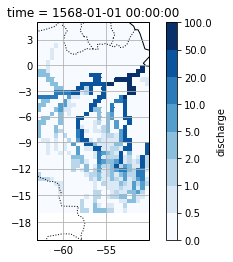

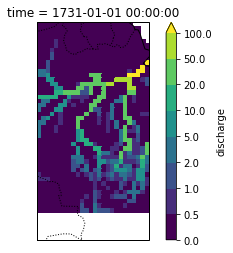

Text(0.5, 1.0, 'mean')

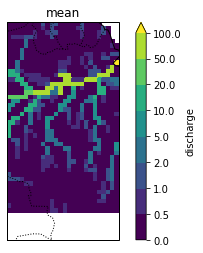

In [15]:
import matplotlib.ticker as mticker
# gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
#                   linewidth=2, color='gray', alpha=0.5, linestyle='--')

levels = [0, 0.5, 1, 2, 5, 10, 20, 50, 100]

Amazon_discharge_flood1=Amazon_discharge.sel(time=megaflood1.time) / megaflood1.values.flatten() *100
Amazon_discharge_flood2=Amazon_discharge.sel(time=megaflood2.time) / megaflood2.values.flatten() *100
Amazon_discharge_mean=Amazon_discharge.mean(dim='time') / Amazon_timeseries.mean().values.flatten() *100
Amazon_timeseries.mean()
Amazon_discharge_mean
# Amazon_spatial.mean(dim='time') / meanflood * 100

map_proj = ccrs.Mercator()
# extent = [-85, -35, 15, -25]
extent = [-63, -50, 5, -20]

ax = plt.axes(projection=map_proj)
ax.set_extent(extent)
ax.coastlines(resolution='110m')
ax.add_feature(cartopy.feature.BORDERS, linestyle=':')
gl= ax.gridlines(draw_labels=True)
gl.xlabels_top = False
gl.ylabels_right = False
# gl.xlines = False
gl.xlocator = mticker.FixedLocator([-65,-60,-55,-50])
Amazon_discharge_flood1.plot(levels=levels,cmap=plt.cm.Blues,transform=ccrs.PlateCarree(), ax=ax)
plt.show()

ax2 = plt.axes(projection=map_proj)
ax2.set_extent(extent)
ax2.coastlines(resolution='110m')
ax2.add_feature(cartopy.feature.BORDERS, linestyle=':')
# ax.gridlines(draw_labels=True)
Amazon_discharge_flood2.plot(levels=levels,transform=ccrs.PlateCarree(), ax=ax2)
plt.show()

ax3 = plt.axes(projection=map_proj)
ax3.set_extent(extent)
ax3.coastlines(resolution='110m')
ax3.add_feature(cartopy.feature.BORDERS, linestyle=':')
# ax.gridlines(draw_labels=True)
Amazon_discharge_mean.plot(levels=levels,transform=ccrs.PlateCarree(), ax=ax3)
ax3.set_title('mean')
